In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("/home/ilaf/Desktop/ML projects/unsupervised learning/AnnualIncomeClustering/AnnualIncome.csv")

In [3]:
data.shape

(200, 5)

In [4]:
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
numerical_cols = ['Age', 'Annual Income (k$)','Spending Score (1-100)']

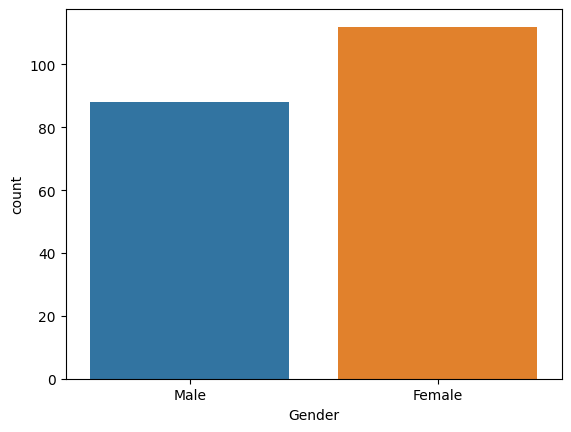

In [9]:
sns.countplot(x ='Gender', data = data)
plt.show()

([<matplotlib.patches.Wedge at 0x7efef39fc790>,
 [Text(-0.20611945413751356, 1.080515974257694, 'Female'),
  Text(0.20611945413751367, -1.080515974257694, 'Male')],
 [Text(-0.11242879316591647, 0.5893723495951058, '56%'),
  Text(0.11242879316591654, -0.5893723495951058, '44%')])

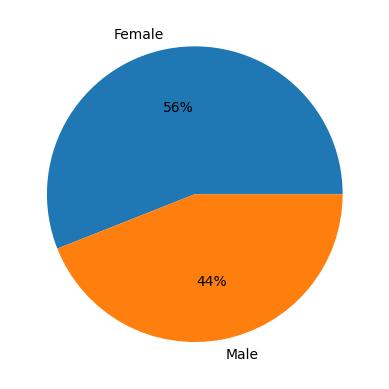

In [10]:
plt.pie(data["Gender"].value_counts(), labels=data["Gender"].value_counts().index, autopct='%.0f%%')

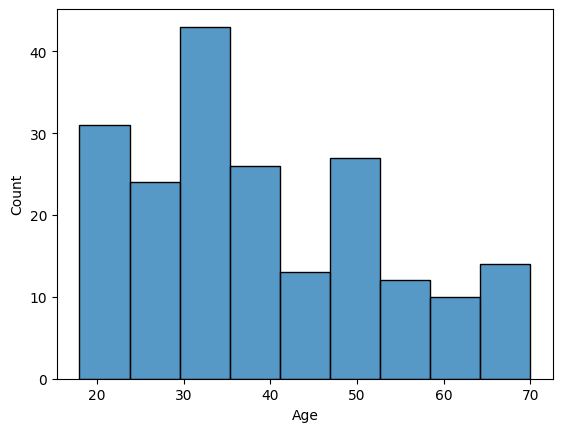

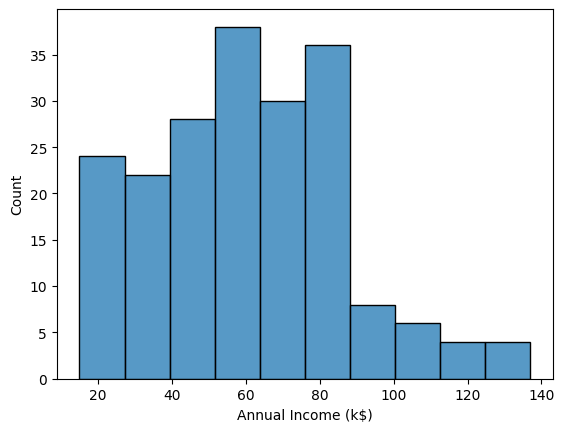

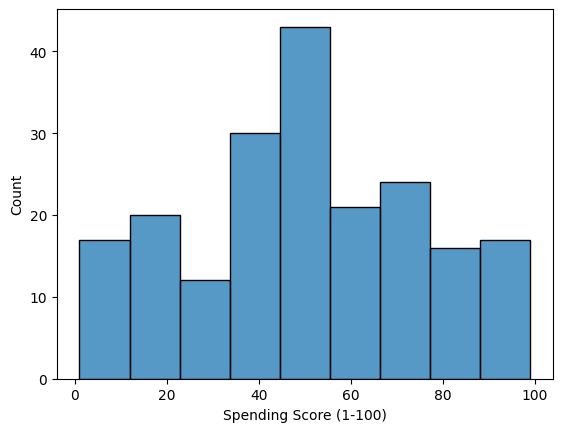

In [11]:
for col in numerical_cols:
    sns.histplot(data = data, x = col)
    plt.show()

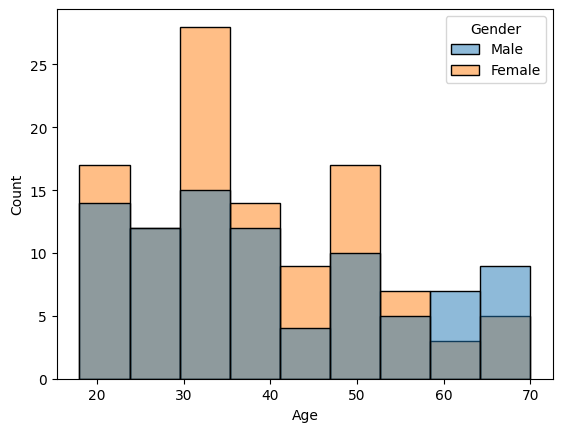

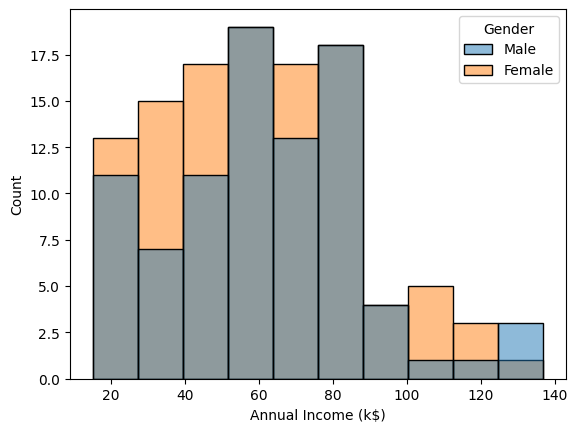

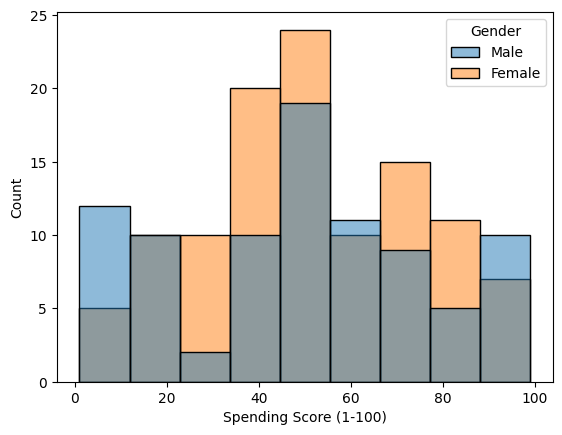

In [12]:
for col in numerical_cols:
    sns.histplot(data = data, x = col, hue = "Gender")
    plt.show()

In [13]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

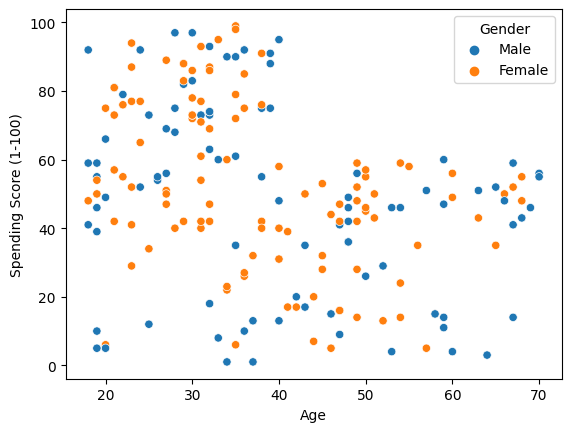

In [14]:
sns.scatterplot(data = data, x = "Age", y = "Spending Score (1-100)", hue = "Gender" )
plt.show()

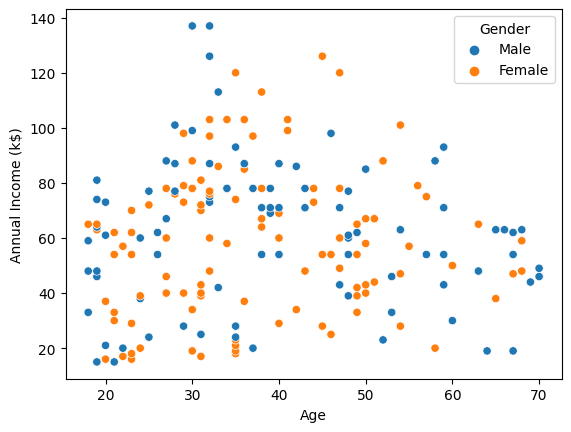

In [15]:
sns.scatterplot(data = data, x = "Age", y = "Annual Income (k$)", hue = "Gender" )
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])

In [17]:
data.drop(["CustomerID"], axis = 1, inplace = True)

In [18]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


<Axes: >

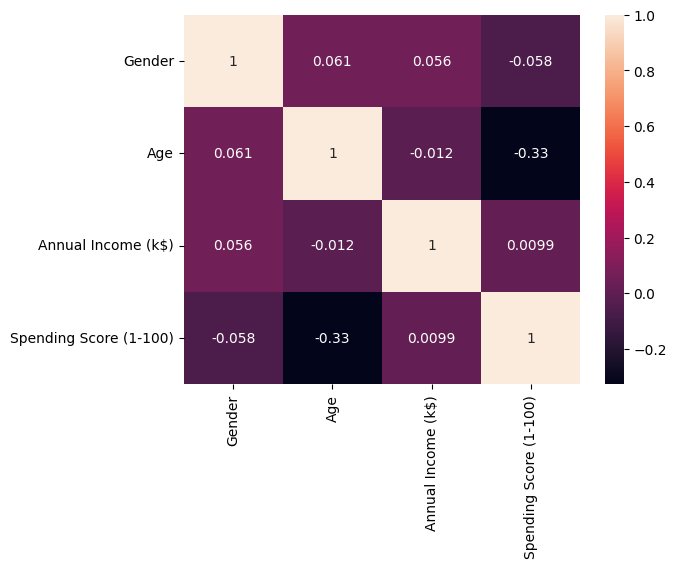

In [19]:
sns.heatmap(data.corr(),annot = True)


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
x = data.values[:,:]
Clus_dataSet = scaler.fit_transform(x)
Clus_dataSet


array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

# K means


In [22]:
from sklearn.cluster import KMeans


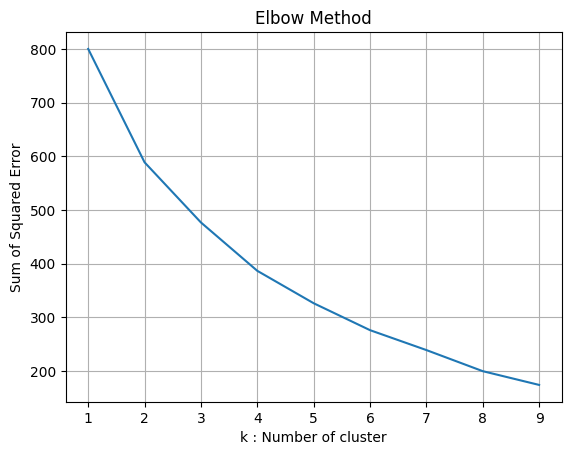

In [23]:
sse = {};sil = [];kmax = 10

# Elbow Method :
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(Clus_dataSet)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

plt.show()

In [24]:
data.columns
# Clus_dataSet

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

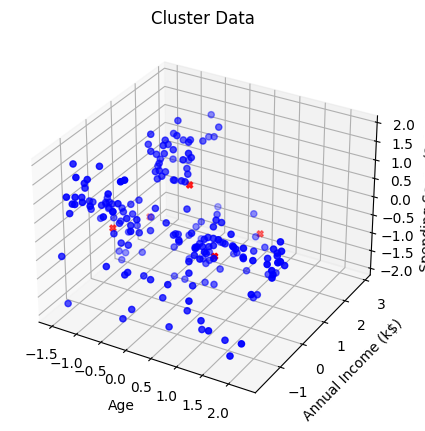

In [25]:
model = KMeans(n_clusters = 5,max_iter = 1000)
model.fit(Clus_dataSet)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_
data['Class'] = labels

x = Clus_dataSet [:, 1]
y = Clus_dataSet [:, 2]
z = Clus_dataSet [:, 3]

fig = plt.figure(figsize = (8, 5))
ax = plt.axes(projection ="3d")

ax.scatter(centroids[:,0],centroids[:,1],centroids[:,2],centroids[:,3],marker="X", color = 'r')
ax.scatter(x,y,z,color = "b")

plt.title('Cluster Data')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show();

In [26]:
labels

array([0, 0, 1, 2, 1, 2, 1, 2, 3, 2, 3, 2, 1, 2, 3, 0, 1, 0, 3, 2, 3, 0,
       1, 0, 1, 0, 1, 0, 1, 2, 3, 2, 3, 0, 1, 2, 1, 2, 1, 2, 1, 0, 3, 2,
       1, 2, 1, 2, 2, 2, 1, 0, 2, 3, 1, 3, 1, 3, 2, 3, 3, 0, 1, 1, 3, 0,
       1, 1, 0, 2, 3, 1, 1, 1, 3, 0, 1, 3, 2, 1, 3, 0, 3, 1, 2, 3, 1, 2,
       2, 1, 1, 0, 3, 1, 2, 0, 1, 2, 3, 0, 2, 1, 3, 0, 3, 2, 1, 3, 3, 3,
       3, 2, 1, 0, 2, 2, 1, 1, 1, 1, 0, 1, 2, 0, 2, 2, 3, 0, 3, 0, 4, 0,
       2, 2, 4, 2, 4, 0, 4, 2, 1, 0, 2, 2, 4, 0, 3, 2, 4, 0, 4, 0, 4, 2,
       4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 4, 0, 4, 2, 4, 2, 4, 0, 4, 0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 0], dtype=int32)

In [27]:
centroids

array([[ 1.12815215, -0.76072691,  0.05496398,  0.83369302],
       [-0.88640526,  0.7517978 , -0.51757746, -0.4420241 ],
       [-0.88640526, -0.75047453, -0.00501655,  0.6979562 ],
       [ 1.12815215,  1.22385356, -0.4498575 , -0.44231533],
       [ 0.25517727,  0.0729628 ,  1.14279271, -1.32381522]])

In [28]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),Class
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,1
3,0,23,16,77,2
4,0,31,17,40,1
...,...,...,...,...,...
195,0,35,120,79,2
196,0,45,126,28,4
197,1,32,126,74,0
198,1,32,137,18,4


In [39]:
from sklearn.decomposition import PCA

pca = PCA()
pca_data = pd.DataFrame(pca.fit_transform(data))
pca.explained_variance_

array([7.00267187e+02, 6.84333968e+02, 1.67271792e+02, 1.25380750e+00,
       2.45179975e-01])

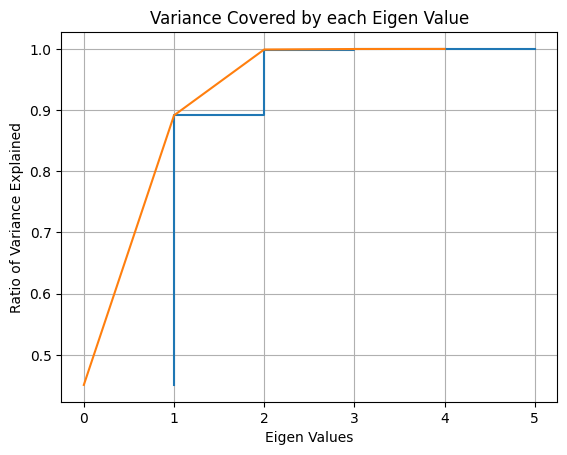

In [40]:
plt.step(list(range(1,6)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.grid()
plt.show()

- This is a very effective method where we add up the variances of all the features in cummulative format.
- Typically eigen values with more than 95% of ratio of variance are selected.
- They correspond to the columns of the PCA generated dataframe.
- In this case, we select the Eigen Value : 2 as the steps generated have significant variances and thus the other features get dominated by their variances.

In [42]:
pca_data = pca_data.drop(columns = [3,4])
pca_data.head()

,0,1,2
0,-31.868647,-33.002797,-22.108310
1,0.777133,-56.846345,-10.571505
2,-57.409846,-13.130521,-28.717245
3,-2.156413,-53.482481,-9.540840
4,-32.173297,-30.389899,-10.192041


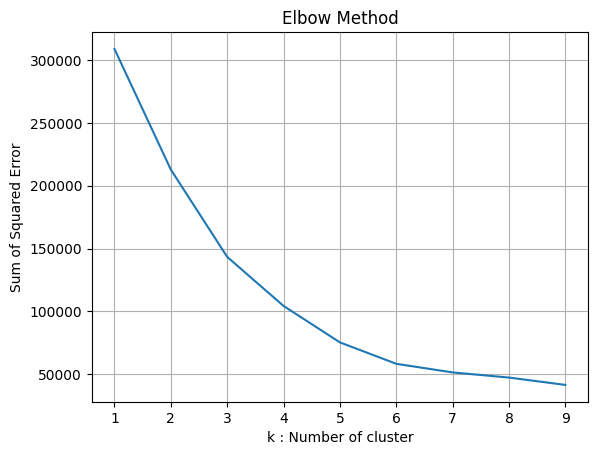

In [43]:
sse = {};sil = [];kmax = 10

# Elbow Method :
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(pca_data)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

plt.show()

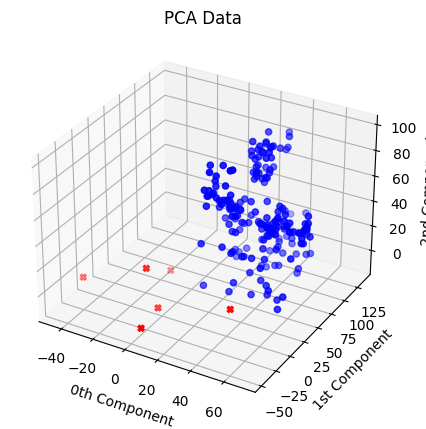

In [47]:
model = KMeans(n_clusters = 6,max_iter = 1000)
model.fit(pca_data)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_
data['Class'] = labels; pca_df2['Class'] = labels



fig = plt.figure(figsize = (8, 5))
ax = plt.axes(projection ="3d")

ax.scatter(centroids[:,0],centroids[:,1],centroids[:,2],marker="X", color = 'r')
ax.scatter(x,y,z,color = "b")

plt.title('PCA Data')
ax.set_xlabel('0th Component')
ax.set_ylabel('1st Component')
ax.set_zlabel('2nd Component')
plt.show();

# Hierarchical Clustering

In [48]:
from scipy.cluster.hierarchy import dendrogram, linkage


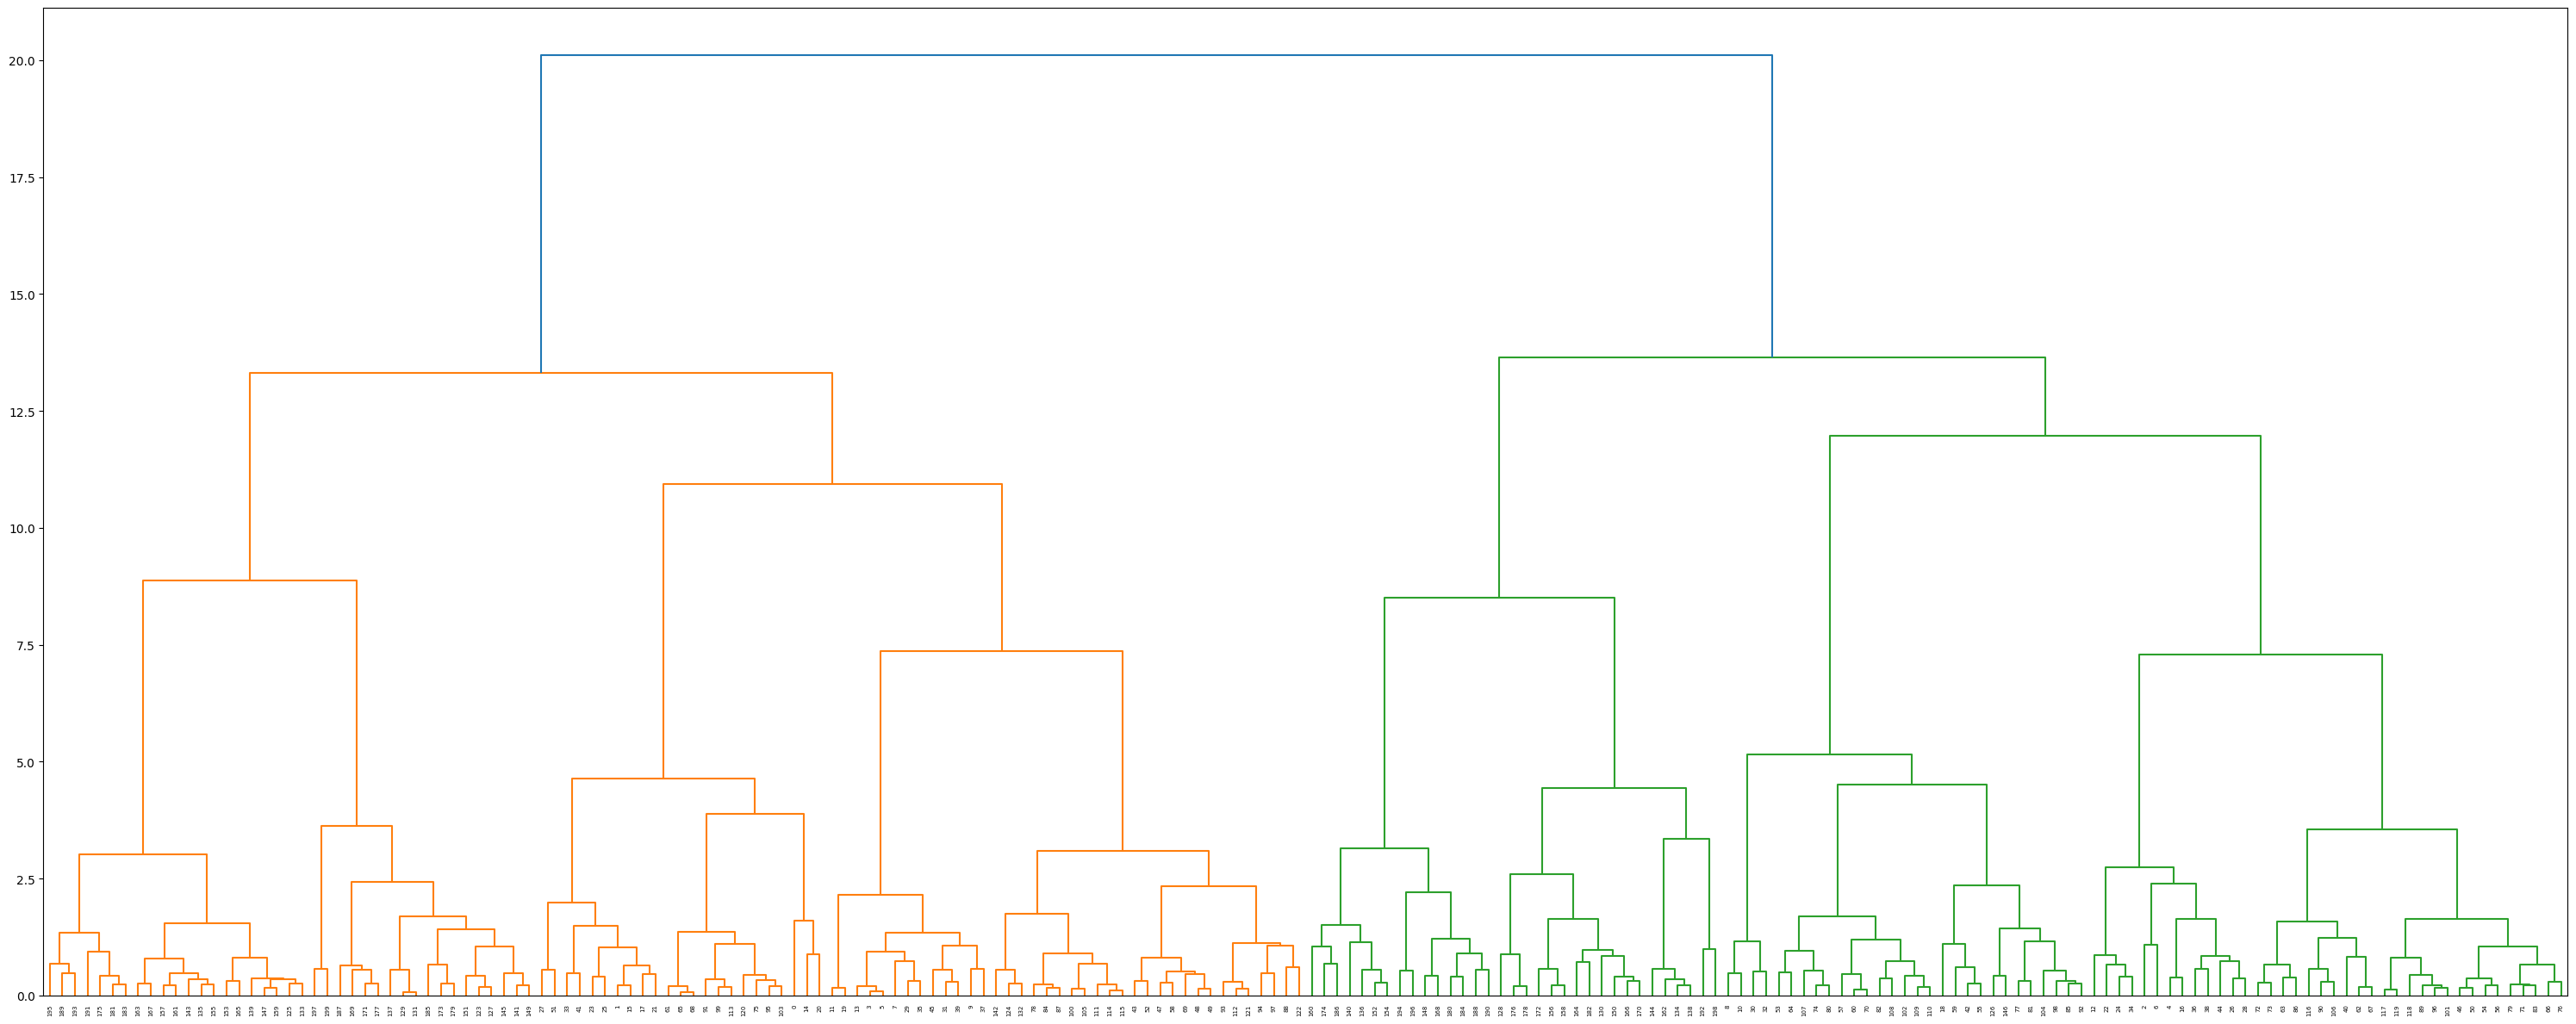

In [54]:
plt.figure(figsize =  [30,12])
linkage_data = linkage(Clus_dataSet, method = 'ward', metric = 'euclidean')
dendrogram(linkage_data)
plt.tight_layout()
plt.show()

In [58]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_cluster = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
labels = hierarchical_cluster.fit(Clus_dataSet)

pred_agc = pd.Series(hierarchical_cluster.labels_)
data['Class'] = pred_agc

In [59]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),Class
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,3
3,0,23,16,77,0
4,0,31,17,40,3
...,...,...,...,...,...
195,0,35,120,79,1
196,0,45,126,28,2
197,1,32,126,74,1
198,1,32,137,18,2


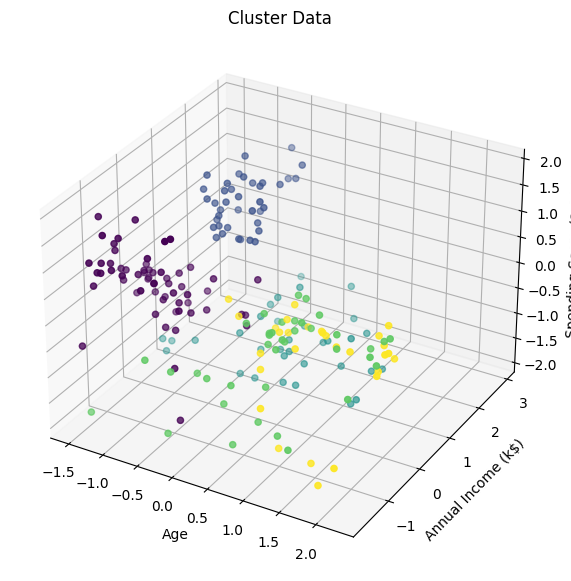

In [63]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

x = Clus_dataSet [:, 1]
y = Clus_dataSet [:, 2]
z = Clus_dataSet [:, 3]

ax.scatter(x,y,z,c = data['Class'])

plt.title('Cluster Data')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show();




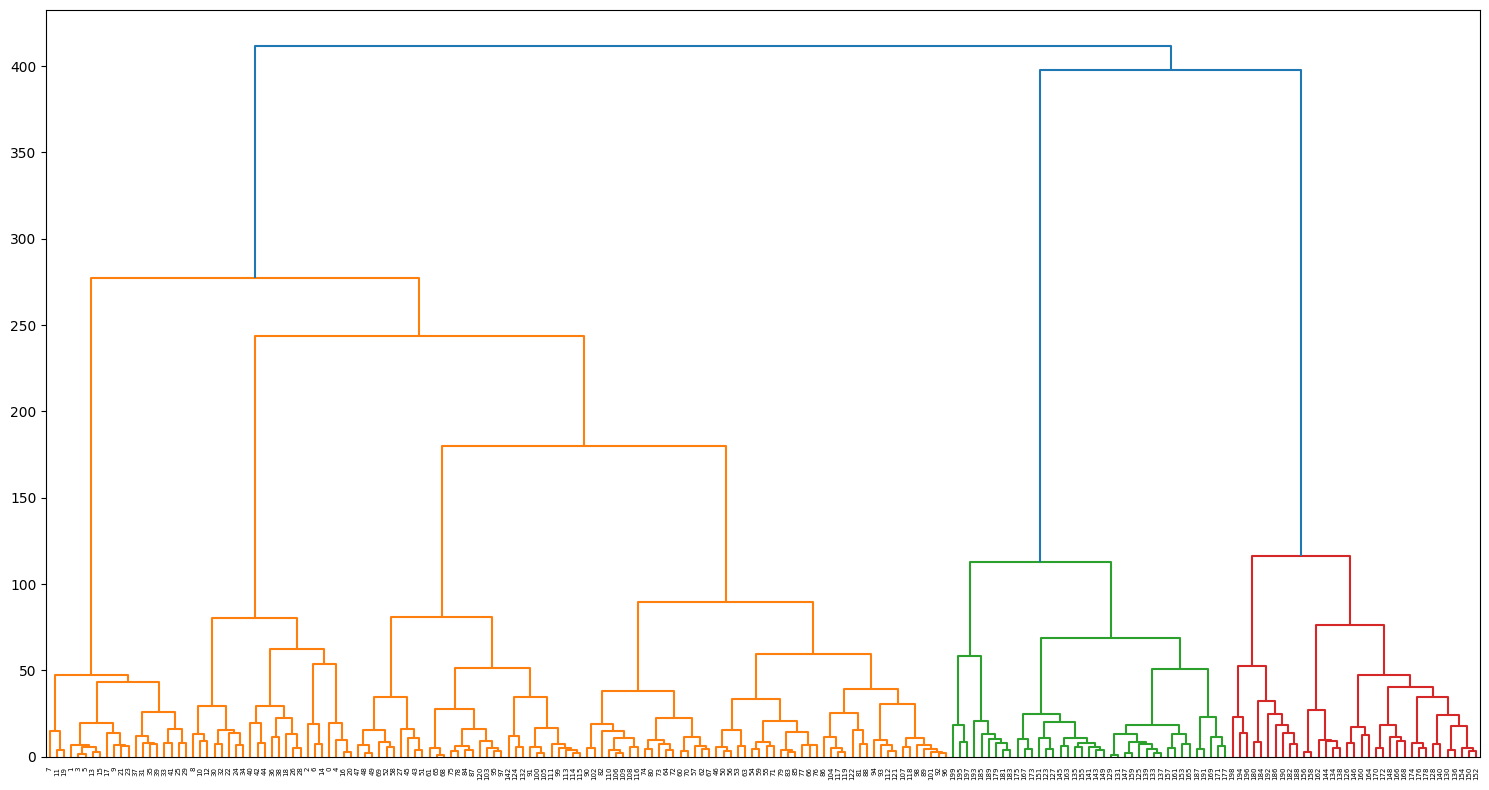

In [65]:
plt.figure(figsize = [15,8])
linkage_data = linkage(pca_data, method = 'ward', metric = 'euclidean')
dendrogram(linkage_data)
plt.tight_layout()
plt.show()

In [68]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_cluster = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
labels = hierarchical_cluster.fit(pca_data)

pred_agc = pd.Series(hierarchical_cluster.labels_)
pca_data['Class'] = pred_agc

In [71]:
pca_data

,0,1,2,Class
0,-31.868647,-33.002797,-22.108310,4
1,0.777133,-56.846345,-10.571505,3
2,-57.409846,-13.130521,-28.717245,4
3,-2.156413,-53.482481,-9.540840,3
4,-32.173297,-30.389899,-10.192041,4
...,...,...,...,...
195,58.345755,31.028227,3.216837,2
196,19.899987,66.447283,1.224529,0
197,58.512983,38.356702,-0.817263,2
198,20.969320,79.377590,-13.662127,0


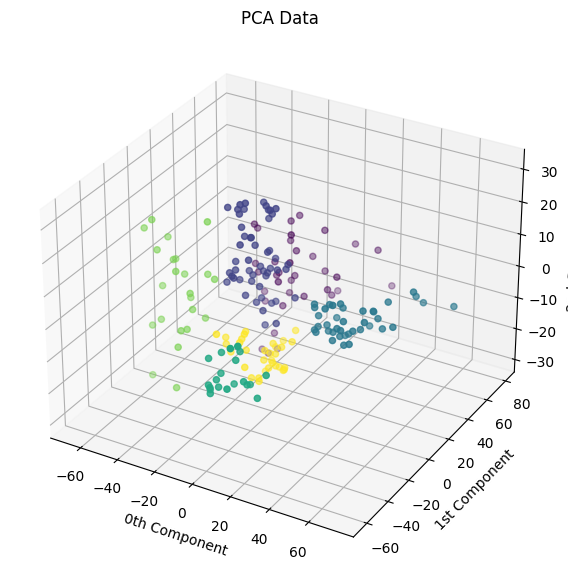

In [72]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
x = np.array(pca_df2[0])
y = np.array(pca_df2[1])
z = np.array(pca_df2[2])
ax.scatter(x,y,z,c = pca_data['Class'])
plt.title('PCA Data')
ax.set_xlabel('0th Component')
ax.set_ylabel('1st Component')
ax.set_zlabel('2nd Component')
plt.show();